### 导入头文件

In [1]:
import numpy as np   #矩阵运算
import random as rand   #产生随机数
import math    #数学运算
import matplotlib.pyplot as plt  #画图

### 参数

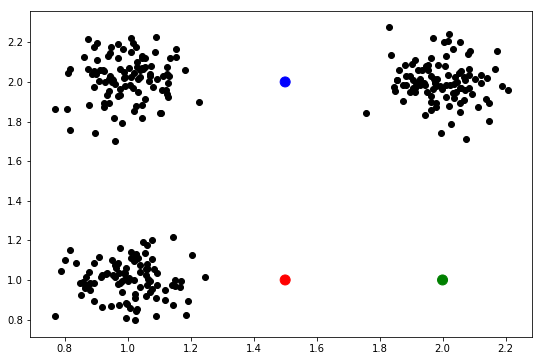

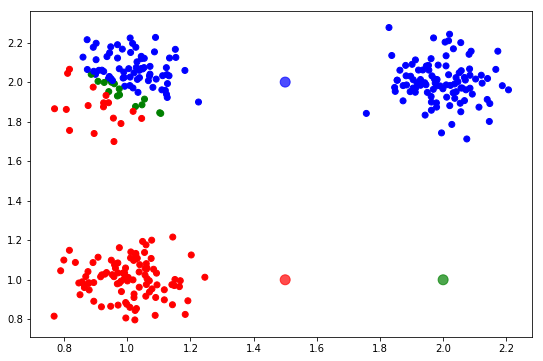

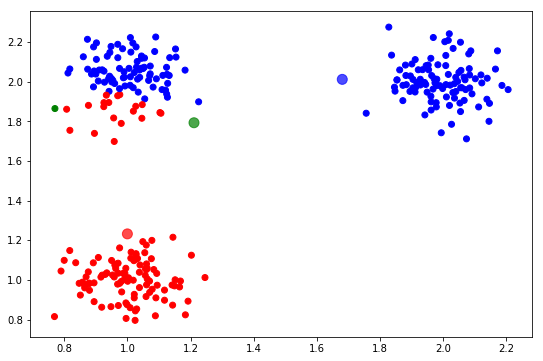

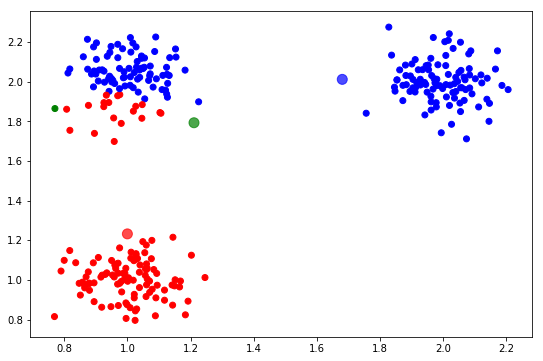

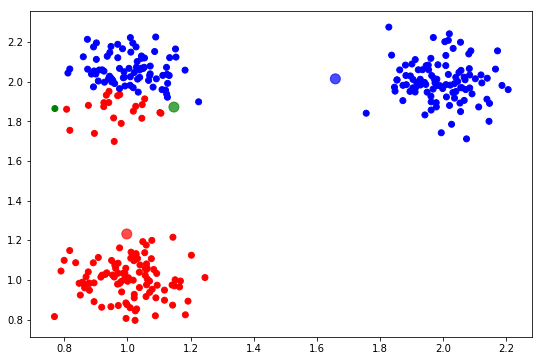

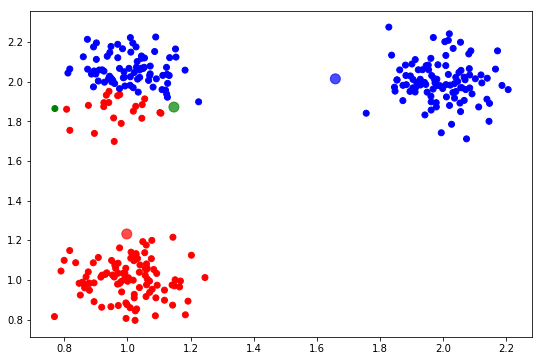

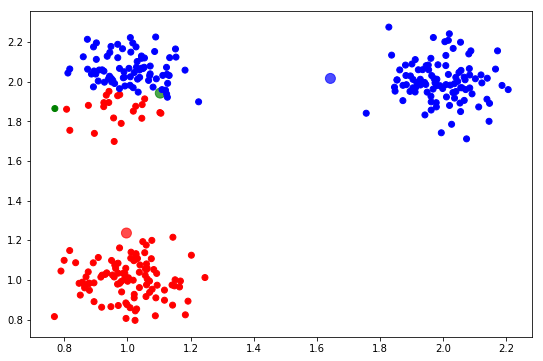

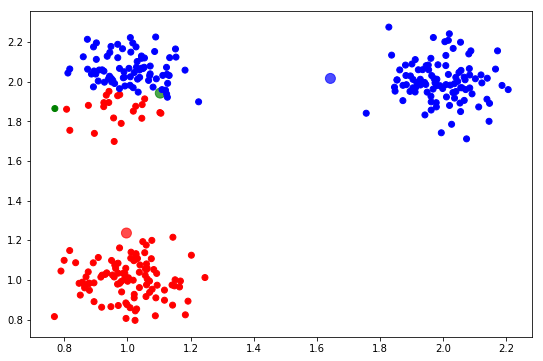

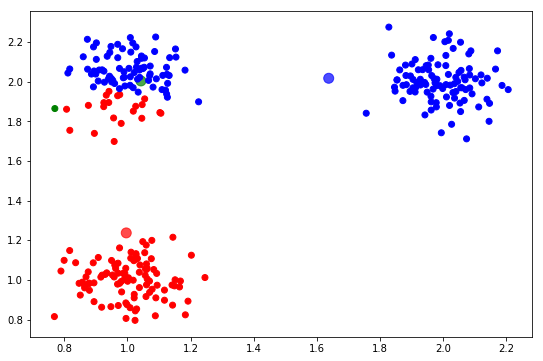

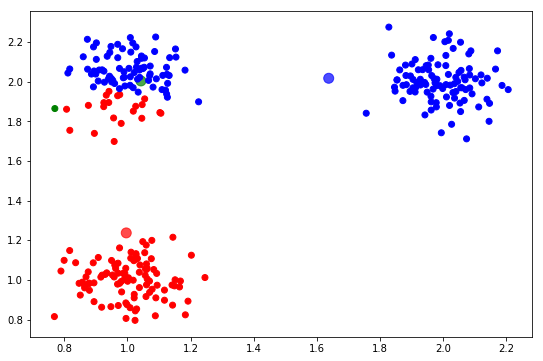

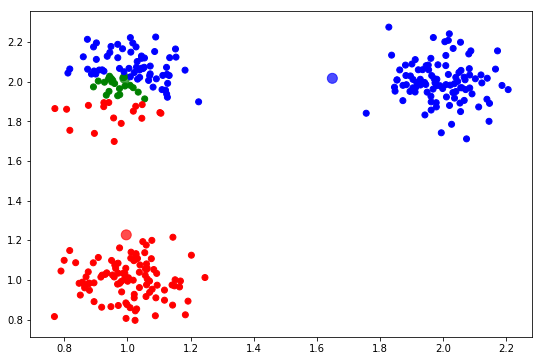

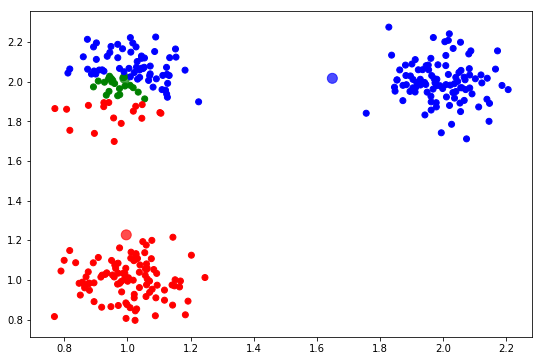

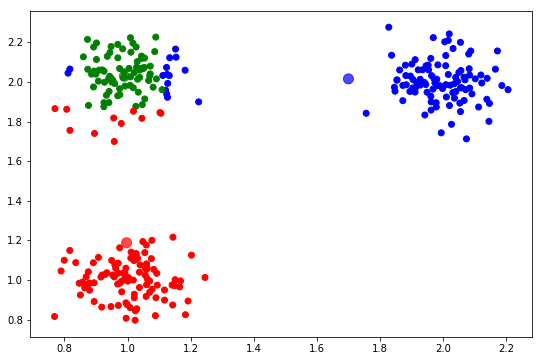

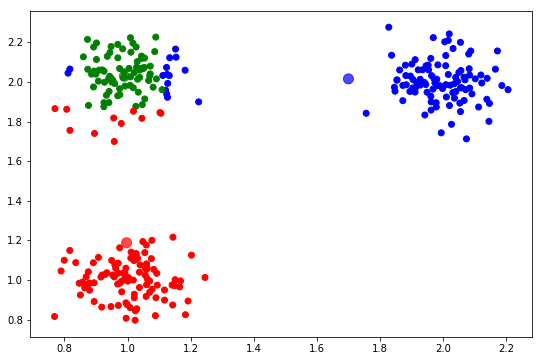

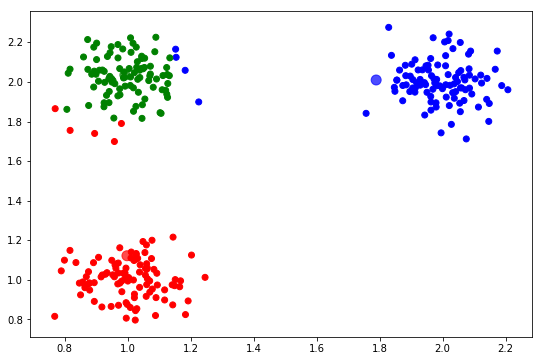

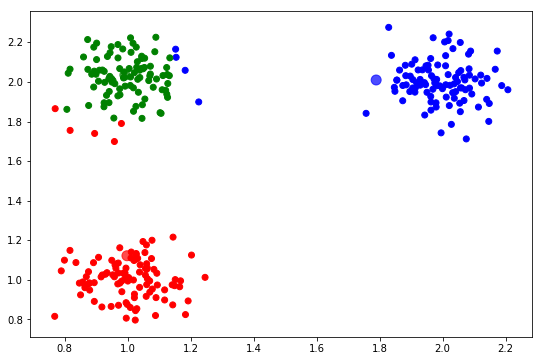

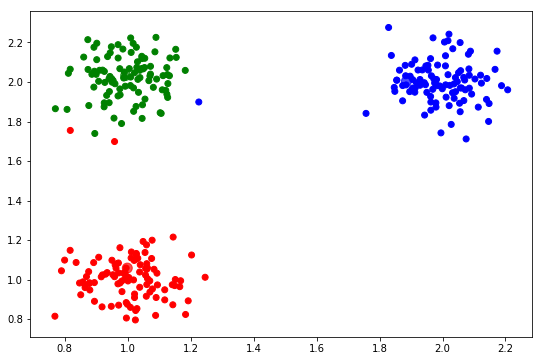

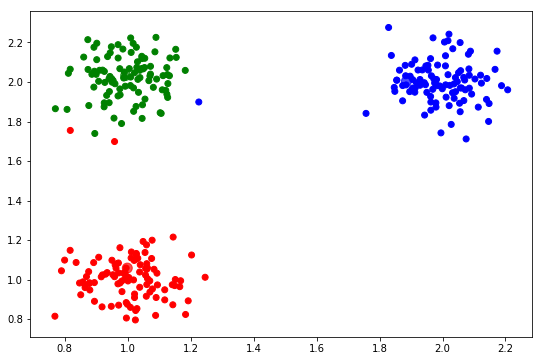

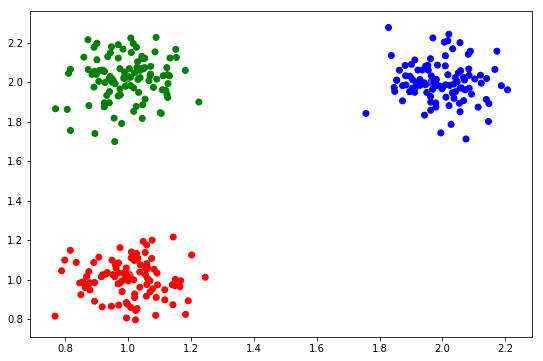

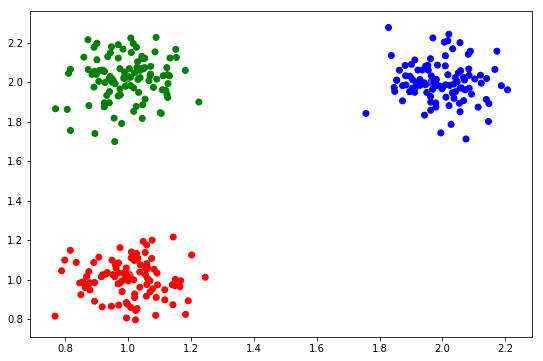

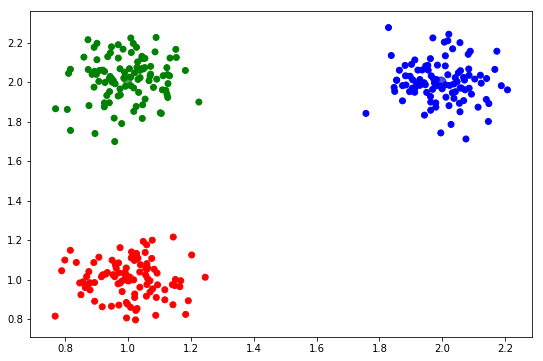

In [3]:
p = []  #shape = 【随机点数 * 分类数】 p[i][j] 表示第i个点属于第j类的概率
X = []  #shape = 【随机点数 * 维数】 这里在二维平面，维数=2，X[i]表示第i个点 X[i][0] X[i][1] -> 横纵坐标 x，y  
N = 0   # 随机点的个数
random_x = [] # 一维 随机点的x坐标list
random_y = [] # 一维 随机点的y坐标list
MU = [] # shape = 【分类数 * 维数】  这里在二维平面，维数=2，MU[i]表示预测属于第i类的中心点 MU[i][0] MU[i][1] -> 横纵坐标 x，y  
SIGMA = [] # shape = 【分类数 * 3】 方差 SIGMA[i]=[MU[i][0], MU[i][1],cov] cov表示二维的概率的协方差
PI = [] # 一维 表示PI[i]表示p第i列的平均值
def sum_p(k):
    sum = 1e-15
    for i in range(N):
        sum += p[i][k]
    return sum

def pai(k):
    return sum_p(k) / N

#return MU_X, MU_Y
def mu(k):
    sum = sum_p(k)
    sum_x = 1e-15
    sum_y = 1e-15
    for i in range(N):
        sum_x += (p[i][k] * x[i])
        sum_y += (p[i][k] * y[i])
    return sum_x/sum, sum_y/sum

#return [x,y,cov]
def sigma(k):
    sumx = 1e-15
    sumy = 1e-15
    cov  = 1e-15
    S = sum_p(k)
    for i in range(N):
        sumx += (p[i][k] * math.pow(x[i] - MU_X[k], 2))
        sumy += (p[i][k] * math.pow(y[i] - MU_Y[k], 2))
        cov  += (p[i][k] * (x[i] - MU_X[k]) * (y[i] - MU_Y[k]))

    return sumx/S, sumy/S, cov/S


#核心  二维高斯分布求法
def guass(x, y, k):
    miux, miuy = MU_X[k], MU_Y[k]
    [sigmax, sigmay, cov] = SIGMA[k]
    covmatrix = np.matrix([[sigmax, cov], [cov, sigmay]])
    cov_inverse = np.linalg.pinv(covmatrix)
    cov_det = np.linalg.det(cov_inverse)
    if cov_det < 0:
        cov_det = 0
    e1 = 1 / (2 * math.pi) * np.sqrt(np.abs(cov_det))
    shift = np.matrix([[x - miux], [y - miuy]])
    er = -0.5 * (np.transpose(shift) * cov_inverse * shift)
    ex = math.exp(er)
    # print("guess=",e1 * ex)
    return e1 * ex

def P(i, k):
    a = PI[k] * guass(x[i], y[i], k)
    b = 1e-15
    for kk in range(len(x1)):
        b += PI[kk] * guass(x[i], y[i], kk)
    return a/b

x1 = [1, 1, 2]
x2 = [1, 2, 2]
num = 100
meu = 0.1
rand = rand.Random()
rand.seed(0)
steps = 10
x = []
y = []
colorSet = ['blue', 'green', 'red']

for i in range(len(x1)):
    x.extend(rand.normalvariate(x1[i], meu) for _ in range(num))
    y.extend(rand.normalvariate(x2[i], meu) for _ in range(num))

N = len(x)

MU_X = [1.5, 2., 1.5]
MU_Y = [2. , 1., 1. ]

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='black')
plt.scatter(MU_X, MU_Y, color=colorSet, s=100)
plt.show()

p = [[0,0,0] for _ in range(len(x))]
PI = [1.0 / 3.0,1.0 / 3.0,1.0 / 3.0]
SIGMA = [[0.7,0.7,-0.6] for _ in range(len(x))]

def draw():
    plt.figure(figsize=(9, 6))
    colors = []
    for i in range(len(x)):
        colors.append(colorSet[p[i].index(max(p[i]))])
    plt.scatter(MU_X, MU_Y, color=colorSet, s=100, alpha=0.7)
    plt.scatter(x, y, color=colors)
    plt.show()

for i in range(N):
    for k in range(len(x1)):
        p[i][k] = P(i, k)
# print("PI=\n", PI)
# print("MU_X, MU_Y=\n",MU_X,MU_Y)
# print("SIGMA=\n", SIGMA)
# print("p:\n",p)

for step in range(steps):
    # print("#############################################################################################################")
    # print("step: ",step)
    # print("step ", step, "\np:\n", p)
    # print("MU :\n", MU_X, "\n", MU_Y, "\nSIGMA:\n", SIGMA)
    draw()
    for k in range(len(x1)):
        PI[k] = pai(k)
    # print("PI=\n", PI)
    for k in range(len(x1)):
        MU_X[k], MU_Y[k] = mu(k)
    # print("MU_X, MU_Y=\n",MU_X,MU_Y)
    for k in range(len(x1)):
        SIGMA[k] = sigma(k)
    # print("SIGMA=\n", SIGMA)
    for i in range(N):
        for k in range(len(x1)):
            p[i][k] = P(i, k)
    # print("p:\n",p)
    draw()
